In [1]:
%matplotlib inline


# Canny edge detector


The Canny filter is a multi-stage edge detector. It uses a filter based on the
derivative of a Gaussian in order to compute the intensity of the gradients.The
Gaussian reduces the effect of noise present in the image. Then, potential
edges are thinned down to 1-pixel curves by removing non-maximum pixels of the
gradient magnitude. Finally, edge pixels are kept or removed using hysteresis
thresholding on the gradient magnitude.

The Canny has three adjustable parameters: the width of the Gaussian (the
noisier the image, the greater the width), and the low and high threshold for
the hysteresis thresholding.




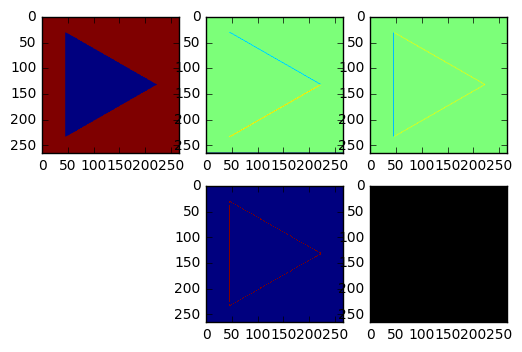

In [5]:
from scipy import misc
from scipy import ndimage

from skimage import data, feature
from skimage.feature import corner_harris, corner_subpix, corner_peaks

import numpy as np

import matplotlib.pyplot as plt


path = 'C:/Users/james/Downloads/triangle'
f = misc.imread(path+'.png', flatten=True)

sx = ndimage.sobel(f, axis=0, mode='constant')
sy = ndimage.sobel(f, axis=1, mode='constant')
sob = np.hypot(sx, sy)


edges = feature.canny(f, sigma=1)

binary_img = f > 0.5

misc.imsave(path+str(1)+'.png', binary_img) # uses the Image module (PIL)



plt.subplot(231)
plt.imshow(f)

plt.subplot(232)
plt.imshow(sx)

plt.subplot(233)
plt.imshow(sy)

plt.subplot(235)
plt.imshow(edges, interpolation='nearest') 

plt.subplot(236)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')

plt.show()

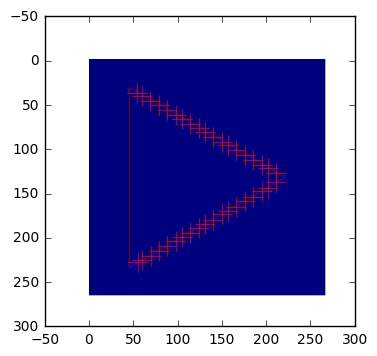

In [141]:
path = 'C:/Users/james/Downloads/nodejs-vs-python'
g = misc.imread(path+'.png')

coords = corner_peaks(corner_harris(edges), min_distance=5)
coords_subpix = corner_subpix(edges, coords, window_size=13)

# display results
plt.imshow(edges)

plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

plt.show()